# Seminar 1 - A Song of Graphs and Search

---

**Course**: Graphs and Network Analysis

**Degree**: Artificial Intelligence Degree (UAB)

**Topic**: Practical seminar that includes exercises from units 1 to 6

**Activity description**: Most of us are familiar with the Game of Thrones books or series. For those who do not know it, it is a fictional series from the HBO chain, inspired by the series of novels "A Song of Ice and Fire", which tells the experiences of a group of characters from different noble houses on the fictional continent of *Westeros* to have control of the Iron Throne and rule the seven kingdoms that make up the territory. The series' success has spawned many blogs and other sources about the series, with additional resources. The graphs that we propose to use in this exercise represent the characters of the series (or books) as nodes, and their co-appearance in a scene (the weights of the edges are higher if two characters appear simultaneously more times). So we have a social network of characters. We will use these graphs to work on some of the concepts seen in the first units of the course (graph and node metrics, search and routes). Finally, synthetic graphs that simulate a realistic network will be generated.

## Qualification

**Submission**: An '.ipynb' file from the colab corresponding to each group will be delivered (this very same file, adding the code blocks and explanations that correspond to each activity). To get the file you will need to go to File --> Download. Remember that you will have to answer and analyze the different problems. Coding alone will NOT be evaluated: explaining and reasoning about the solution of the problem is essential. **You should provide explanations of the obtained results for at least the exercises marked with the 💬 symbol**. 
The outcome of this seminar will thus be an analysis of the network at different levels: global metrics, node importance, shortest paths, random graphs, and visualization. 

**Delivery form**: The work must be done in groups of two people and delivered through the virtual campus (in the section corresponding to Seminar 1).

**Doubts**: For any questions, apart from class sessions, you can contact cristina.perez@uab.cat.

**Deadline**: March 15 (during all day).

**Marks**: The grade of the seminars (seminar 1 + seminar 2) has a weight of 10% on the final grade of the subject.


## 1. Environment setup
----

The main libraries that will be used in this seminar are the following:

* [NetworkX](https://networkx.github.io/)
* [Pandas](https://pandas.pydata.org/)
* [Matplotlib](https://matplotlib.org/)
* [NumPy](https://numpy.org/)



In [1]:
#!pip install --upgrade scipy networkx

In [2]:
#!apt install libgraphviz-dev
#!pip install pygraphviz

In [3]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_pydot import graphviz_layout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

## 2. Data collection

---

This seminar is based on data from *Game of Thrones* and "A Song of Ice and Fire" curated by Andrew Beveridge. Data is available from two different github repositories:

* [Book to Network](https://github.com/mathbeveridge/asoiaf)
* [Script to Network](https://github.com/mathbeveridge/gameofthrones)

In each of them, there is a *data* folder with several *.csv* files that encode nodes and edges of different networks.

To download the data in the *colab* environment you can run the following command:

```
$ !wget https://raw.githubusercontent.com/mathbeveridge/repo_name/master/data/file_id-nodes.csv
$ !wget https://raw.githubusercontent.com/mathbeveridge/repo_name/master/data/file_id-edges.csv
```


where,

* **repo_name** is the name of the repository, *asoiaf* for the Books and *gameofthrones* for the Script.
* **file_id** is the ID of the file you can find with the link. This indicates the book or season number.

For example, to download the graph of the first season of the series, we would run:

```
$ !wget https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s1-nodes.csv
$ !wget https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s1-edges.csv
```

The downloaded files can be found in */content/file_name*.

For this activity, we will work with the graph generated from all the books. 


*  **Download the two .csv files corresponding to the graph generated from all the books (asoiaf-all)**.

Just by substituting with the needed links it is so easy.

In [4]:
!wget https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-edges.csv
!wget https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-nodes.csv

--2023-03-15 09:31:55--  https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-edges.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122588 (120K) [text/plain]
Saving to: ‘asoiaf-all-edges.csv’

asoiaf-all-edges.cs 100%[===================>] 119.71K  --.-KB/s    in 0.002s  

2023-03-15 09:31:55 (56.1 MB/s) - ‘asoiaf-all-edges.csv’ saved [122588/122588]

--2023-03-15 09:31:55--  https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-nodes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

## 3. Data load

---

The function *csv_to_graph()* creates a NetworkX graph from the *.csv* files encoding edges and nodes.

In [5]:
def csv_to_graph(file_id_nodes: str, file_id_edges: str, origin: str = 'book') \
                    -> nx.graph:
    """Return a nx.graph
    
    Build a graph given a csv file for nodes and edge.
    origin controls the source of the graph to adapt the node features.
    """
    
    if origin == 'book':
        key1, key2 = 'weight', 'book'
    elif origin == 'script':
        key1, key2 = 'Weight', 'Season'
    else:
        raise NameError('Unknown origin {}'.format(origin))
        
    nodes = pd.read_csv(file_id_nodes)
    edges = pd.read_csv(file_id_edges)

    if key2 not in edges:
        key2 = 'id'
        
    g = nx.Graph()
    for row in nodes.iterrows():
        g.add_node(row[1]['Id'], name=row[1]['Label'])

    for row in edges.iterrows():
        g.add_edge(row[1]['Source'],row[1]['Target'], 
                   weight=1/row[1][key1], id=row[1][key2])

    return g


* **Create a NetworkX graph from the downloaded files using the `csv_to_graph` function.** [Optionally, you can repeat the process with the graph generated from the series]

In [6]:
g_book = csv_to_graph('/content/asoiaf-all-nodes.csv', '/content/asoiaf-all-edges.csv', origin='book')

* **Generate a first exploratory visualization of the graph.**

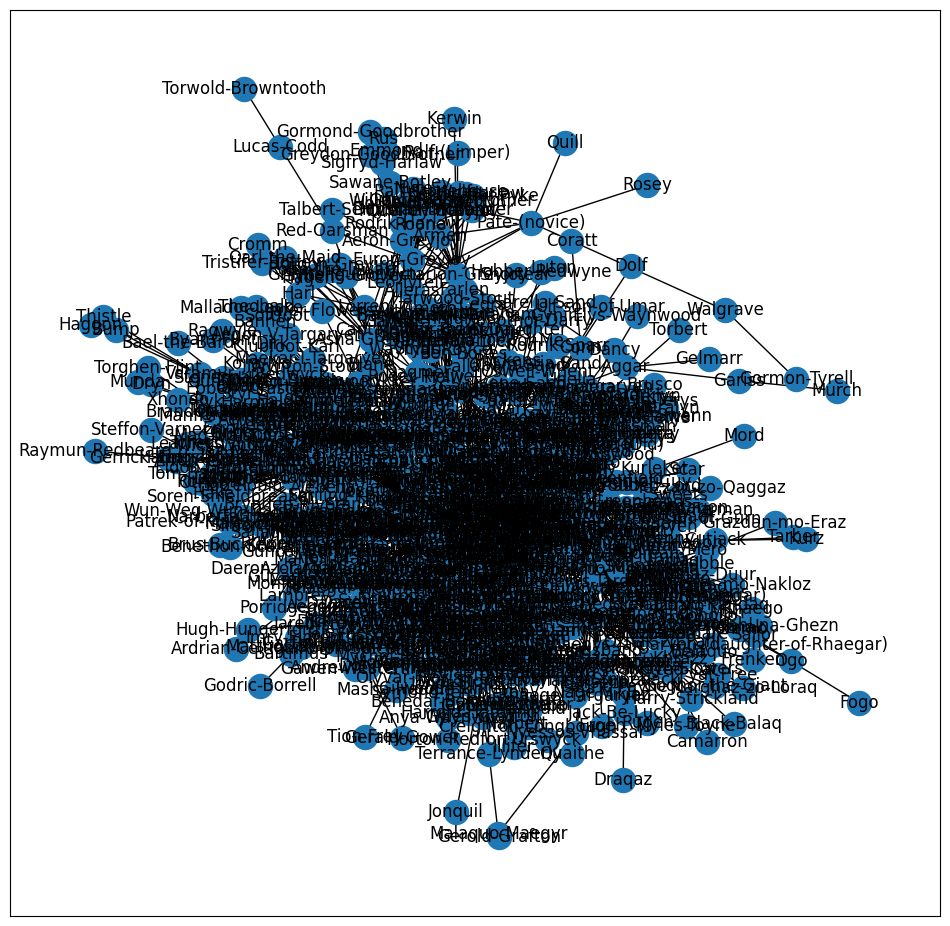

In [7]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100

pos = nx.spring_layout(g_book, seed=42)
nx.draw_networkx(g_book, pos=pos)

## 4. General graph metrics
---

Perform a general summary of the Network properties.

* **💬  Obtain the order, size and density of the graph, as well as the average degree of its nodes.**


In [8]:
a = g_book.order()
b = g_book.size()
c = nx.density(g_book)

print ("Graph order: {}, Graph size: {}, Graph density: {}".format(a,b,c))

total_degree = 0
nodes = 0
for node in g_book:
    nodes += 1
    total_degree += g_book.degree(node)
avg_degree = total_degree / nodes

print ("Average degree of graph´s nodes: {}".format(avg_degree))
print ("Rounded average degree of graph´s nodes: {}".format(int(avg_degree)))

Graph order: 796, Graph size: 2823, Graph density: 0.008921968332227173
Average degree of graph´s nodes: 7.092964824120603
Rounded average degree of graph´s nodes: 7


💬 : 

1.  The **order** of a graph refers to its number of nodes.

2. The **size** of a graph refers to its number of edges.
      
3. The **density** of a network is the fraction between 0 and 1 that tell us what portion of all possible edges are actually realized in the network.
      
4. The **average degree** is simply the average number of edges per node in the graph.

* **Check that it is a connected undirected graph.**

In [9]:
"The graph is a connected undirected graph." if (nx.is_connected(g_book) and not nx.is_directed(g_book)) else "The graph is NOT a connected undirected graph."


'The graph is a connected undirected graph.'

* **💬 Make a small report on the metrics of the given graph (diameter, radius, average network distance, clustering coefficient).**

In [10]:
diameter = nx.diameter(g_book)
radius = nx.radius(g_book)
avg_distance = nx.average_shortest_path_length(g_book)
clustering_coefficient = nx.average_clustering(g_book)

print(f"Graph´s Diameter: {diameter}")
print(f"Graph´s Radius: {radius}")
print(f"Graph´s Average Network Distance: {avg_distance}")
print(f"Graph´s Clustering Coefficient: {clustering_coefficient}")

Graph´s Diameter: 9
Graph´s Radius: 5
Graph´s Average Network Distance: 3.416225783003066
Graph´s Clustering Coefficient: 0.4858622073350485


💬 :
1. The **diameter** of the graph is **9**. This means that the maximum distance between any two nodes in the graph is 9.

2. The **radius** of the graph is **5**. This means that the minimum distance between any node and all other nodes in the graph is 5.

3. The **average network distance** of the graph is approximately **3.416**. This means that on average, it takes about 3.416 steps to get from one node to another in this graph.

4. The **clustering coefficient** of the graph is approximately **0.486**. This suggests that there are a moderate number of triangles formed by connected triples in this graph. (Note that the clustering coefficient ranges [0-1])

## 5. Centrality metrics: Characters' importance
---


In this section, we will study the importance of the characters according to their centrality in the graph.

* **Compute the 10 most central nodes in the network taking into account the different types of centrality (degree, betweenness, closeness and eigenvector centrality). Moreover, use page rank to assess importance of the characters.**

  * *centrality_bar_plot()*: Given the corresponding centrality draw a bar graph.
  * 💬 Try to reason about the changes that occur with the different types of centrality.

###Degree centrality:

In [11]:
def degree(graph):
    top_10_degree_centralities= sorted(nx.degree_centrality(graph).items(), key=lambda items: items[1])[graph.order():graph.order()-11:-1]
    print("Sorted top-10 degree centrality value nodes")
    for i,n in enumerate(top_10_degree_centralities):
        print(str(i+1)+":", n)
    print("\n")
    return dict(top_10_degree_centralities)

### Betweenness centrality: 

In [12]:
def betweenness(graph):
    top_10_betweenness_centralities= sorted(nx.betweenness_centrality(graph).items(), key=lambda items: items[1])[graph.order():graph.order()-11:-1]
    print("Sorted top-10 betweenness centrality value nodes")
    for i,n in enumerate(top_10_betweenness_centralities):
        print(str(i+1)+":", n)
    print("\n")
    return dict(top_10_betweenness_centralities)

### Closeness centrality: 

In [13]:
def closeness(graph):
    top_10_closeness_centralities= sorted(nx.closeness_centrality(graph).items(), key=lambda items: items[1])[graph.order():graph.order()-11:-1]
    print("Sorted top-10 closeness centrality value nodes")
    for i,n in enumerate(top_10_closeness_centralities):
        print(str(i+1)+":", n)
    print("\n")
    return dict(top_10_closeness_centralities)

### Eigen centrality: 

In [14]:
def eigen(graph):
    top_10_eigen_centralities= sorted(nx.eigenvector_centrality(graph).items(), key=lambda items: items[1])[graph.order():graph.order()-11:-1]
    print("Sorted top-10 eigen centrality value nodes")
    for i,n in enumerate(top_10_eigen_centralities):
        print(str(i+1)+":", n)
    print("\n")
    return dict(top_10_eigen_centralities)


###💬
*   **Degree centrality**: This metric measures the number of edges that are connected to a given node, also known as its degree. Nodes with high degree centrality are often referred to as "hubs" and are important for facilitating communication between different parts of the network. 
*   **Betweenness centrality**: This metric measures the extent to which a node lies on the shortest paths between pairs of other nodes in the network. Nodes with high betweenness centrality are often referred to as "bridges" and are important for maintaining the connectivity of the network.
*   **Closeness centrality**: This metric measures the average length of the shortest paths between a node and all other nodes in the network. Nodes with high closeness centrality are often located near the center of the network and are important for facilitating efficient communication.
*   **Eigenvector centrality**: This metric is based on the idea that a node's importance is determined by the importance of its neighbors. Eigen centrality measures a node's centrality by computing the principal eigenvector of the adjacency matrix of the network. Nodes with high eigen centrality are often well-connected to other important nodes in the network.











Different centrality metrics can lead to different rankings of nodes in the network, and therefore different insights into the structure and function of the network. For example, a node with high degree centrality may not necessarily have high betweenness or closeness centrality. Understanding the differences between these metrics can help identify the most important nodes in a network for different purposes, such as communication, influence, or control.

### **Centrality plots:**

In [15]:
def centrality_bar_plot(centrality, name='betweenness', n=10):
    labels = [label for label in centrality.keys()] # Nodes' names
    values = [value for value in centrality.values()] #Centrality value
    
    df = pd.DataFrame({'Name': labels, name: values})
    ax = df.plot.bar (x = 'Name', y=name, rot=90)
    plt.ylabel("Centrality value")
    plt.show()

Sorted top-10 degree centrality value nodes
1: ('Tyrion-Lannister', 0.15345911949685534)
2: ('Jon-Snow', 0.14339622641509434)
3: ('Jaime-Lannister', 0.1270440251572327)
4: ('Cersei-Lannister', 0.1220125786163522)
5: ('Stannis-Baratheon', 0.11194968553459118)
6: ('Arya-Stark', 0.10566037735849056)
7: ('Sansa-Stark', 0.09433962264150943)
8: ('Catelyn-Stark', 0.09433962264150943)
9: ('Robb-Stark', 0.0930817610062893)
10: ('Eddard-Stark', 0.0930817610062893)


Sorted top-10 betweenness centrality value nodes
1: ('Jon-Snow', 0.19211961968354507)
2: ('Tyrion-Lannister', 0.16219109611159835)
3: ('Daenerys-Targaryen', 0.11841801916269194)
4: ('Theon-Greyjoy', 0.11128331813470256)
5: ('Stannis-Baratheon', 0.11013955266679563)
6: ('Jaime-Lannister', 0.10083800602581632)
7: ('Cersei-Lannister', 0.0887042665586028)
8: ('Arya-Stark', 0.08724236063571161)
9: ('Eddard-Stark', 0.07873239257251868)
10: ('Robert-Baratheon', 0.0782276906038325)


Sorted top-10 closeness centrality value nodes
1: ('Tyrion

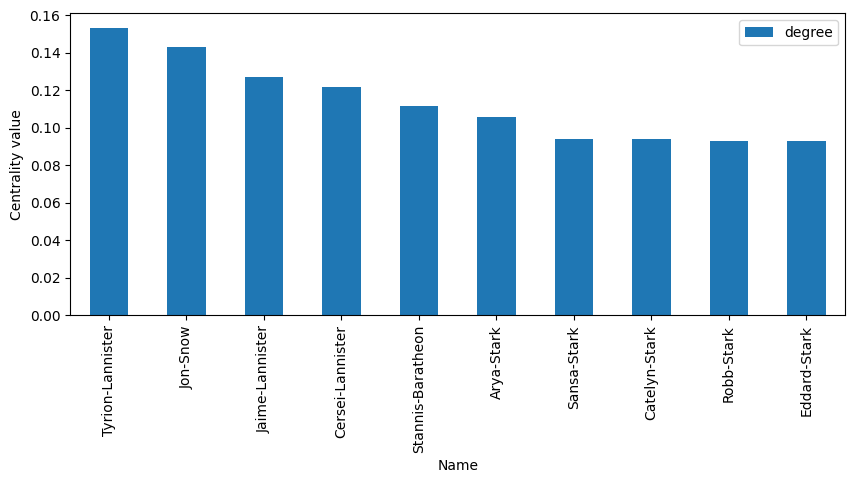

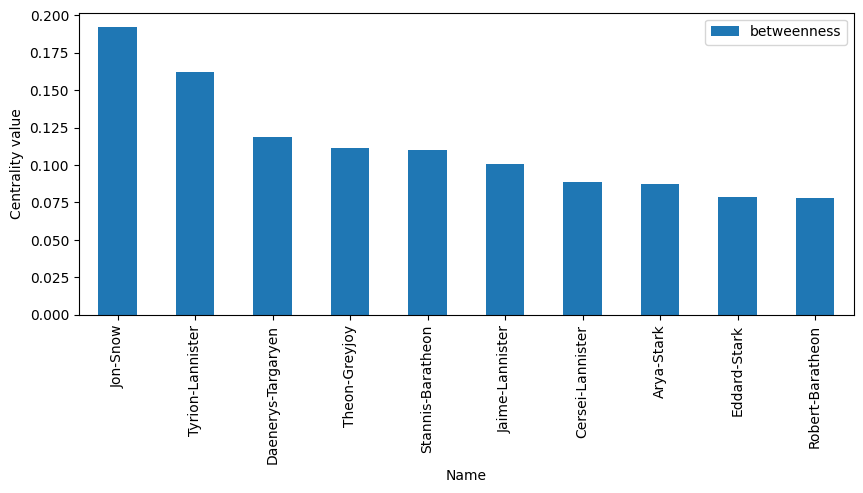

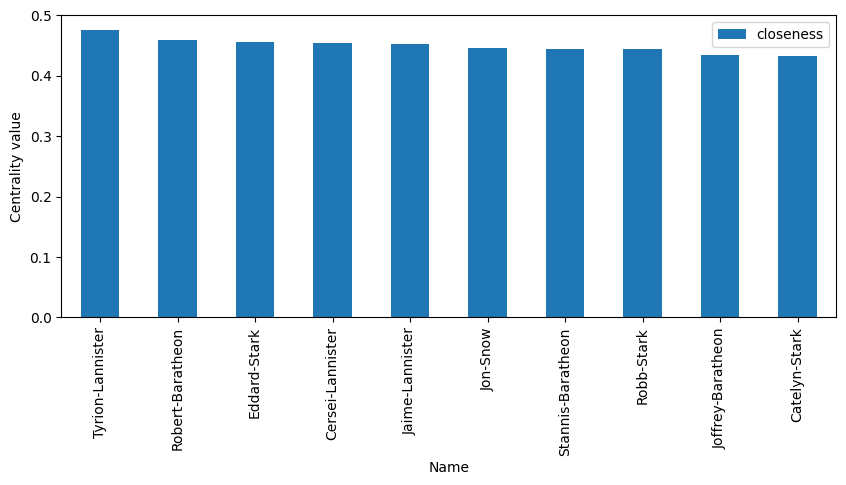

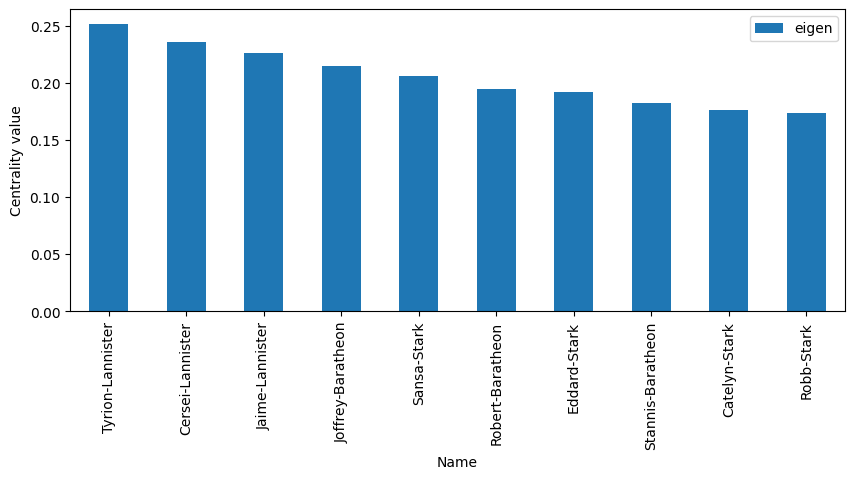

In [16]:
plt.rcParams['figure.figsize'] = [10, 4]

degree_centrality = degree(g_book) # Degree Centrality
betweenness_centrality = betweenness(g_book) # Betweenness Centrality
closeness_centrality = closeness(g_book) # Closeness Centrality
eigen_centrality = eigen(g_book) # Eigenvalue Centrality

centrality_bar_plot(degree_centrality, name='degree')
centrality_bar_plot(betweenness_centrality, name='betweenness')
centrality_bar_plot(closeness_centrality, name='closeness')
centrality_bar_plot(eigen_centrality, name='eigen')

plt.rcParams['figure.figsize'] = [12, 12]

In [17]:
# Page rank:
sortedPR =sorted(nx.pagerank(g_book).items(), key=lambda e: e[1], reverse=True)
print(f"Sorted PageRank: \n{sortedPR}")

Sorted PageRank: 
[('Jon-Snow', 0.01512641861426675), ('Jaime-Lannister', 0.01361785505171803), ('Tyrion-Lannister', 0.012645504669064948), ('Stannis-Baratheon', 0.012525017354769736), ('Theon-Greyjoy', 0.01148701666574283), ('Cersei-Lannister', 0.010708219188528208), ('Daenerys-Targaryen', 0.010646598590330944), ('Arya-Stark', 0.010510035815971057), ('Eddard-Stark', 0.009588736026139393), ('Robb-Stark', 0.009379048470069106), ('Catelyn-Stark', 0.009211764751483198), ('Sansa-Stark', 0.008695660500700161), ('Robert-Baratheon', 0.007407365127365177), ('Bran-Stark', 0.006840474485036948), ('Brienne-of-Tarth', 0.00670568466318583), ('Joffrey-Baratheon', 0.006376268581619495), ('Victarion-Greyjoy', 0.00626054147461697), ('Barristan-Selmy', 0.006250154266414331), ('Tywin-Lannister', 0.006090249563963154), ('Petyr-Baelish', 0.005629829893101798), ('Davos-Seaworth', 0.005428472585517504), ('Samwell-Tarly', 0.005340670965075198), ('Renly-Baratheon', 0.005018895732234255), ('Asha-Greyjoy', 0.004


💬 

PageRank computes a ranking of the nodes in the graph G based on
the structure of the incoming links. It was originally designed as
an algorithm to rank web pages. 

Even if it was originally developed for web search, the same concept can be applied to other types of networks, such as social networks or citation networks. In these cases, the importance of a node is determined by the number and quality of other nodes that are connected to it, rather than the number of links or citations it receives.

So some characters, usuall main characters, are very connected between each other and are so important in the story as well as in our network.

* **What is the subgraph generated by the best connected characters?**
  * Use closeness centrality to generate the graph of the 25 most central characters.

Graph with 25 nodes and 208 edges


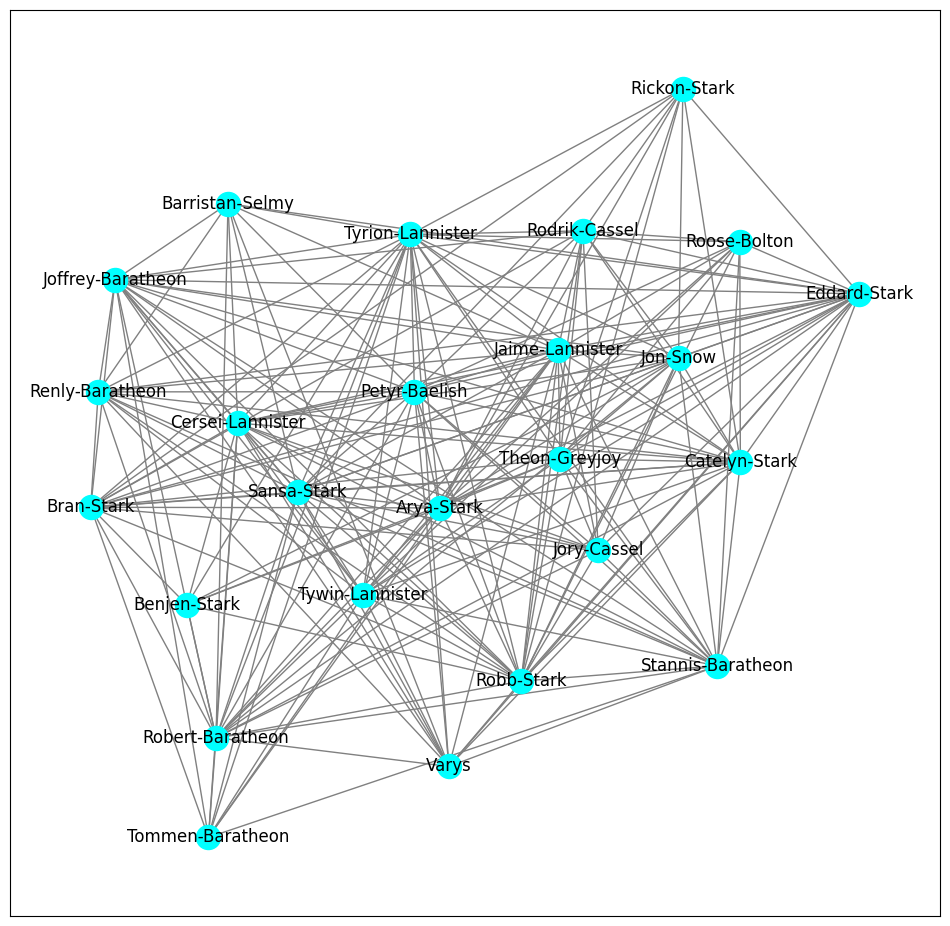

In [18]:
def centrality_subgraph(g, n=25):
    nodes = sorted(nx.closeness_centrality(g).items(), key=lambda items: items[1])[g.order():g.order()-n - 1:-1]
    node_names = [node[0] for node in nodes]  # extract node names
    subgraph = g.subgraph(node_names)  # create subgraph using node names
    return subgraph

g_book_sub = centrality_subgraph(g_book)
print(g_book_sub)
nx.draw_networkx(g_book_sub, edge_color = 'gray', node_color = 'cyan')


* **Draw this subgraph where the nodes are of size proportional to their centrality. Mark the most central and the less central node in the graph (for instance, use the color of the node to highlight it).**
  * Use *closeness centrality* and scale it appropriately to emphasize the importance of different nodes.

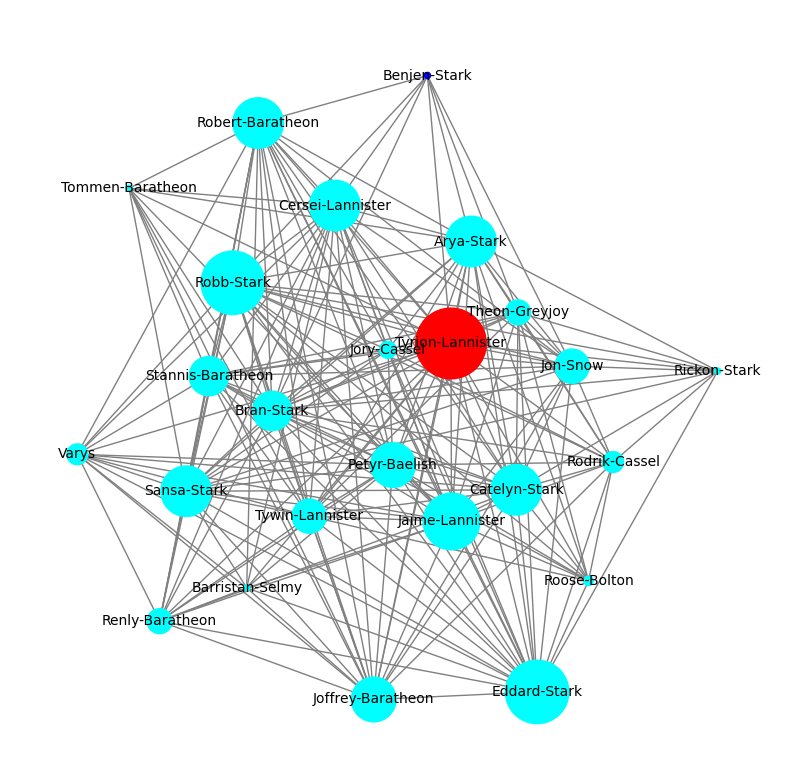

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def centrality_subgraph(g, n=25):
    nodes = sorted(nx.closeness_centrality(g).items(), key=lambda items: items[1])[g.order():g.order()-n - 1:-1]
    node_names = [node[0] for node in nodes]  # extract node names
    subgraph = g.subgraph(node_names)  # create subgraph using node names
    return subgraph

g_book_sub = centrality_subgraph(g_book)

# Calculate centrality values and scale them appropriately
centrality = nx.closeness_centrality(g_book_sub)

max_centrality = max(centrality.values())
min_centrality = min(centrality.values())
size_factor = 20000  # adjust this to change the overall size of the nodes

# Calculate node sizes based on their centrality
node_sizes = []
for node in g_book_sub.nodes():
    node_size = 20  # minimum size
    if centrality[node] > min_centrality:
        node_size = size_factor * (centrality[node] - min_centrality)**2
    node_sizes.append(node_size)

# Highlight the most and least central node by using a different color
most_central = max(centrality, key=centrality.get)
least_central = min(centrality, key=centrality.get)

node_colors = ['red' if node == most_central else 'blue' if node == least_central else 'cyan' for node in g_book_sub.nodes()]

# Draw the subgraph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(g_book_sub, seed=42)
nx.draw_networkx_edges(g_book_sub, pos=pos, edge_color='gray')
nx.draw_networkx_nodes(g_book_sub, pos=pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(g_book_sub, pos=pos, font_size=10)
plt.axis('off')

plt.show()


As you can denote, the smallest (and less connected according to closeness centrality) node is painted in blue, he is called Benje Stark, while the biggest (and most connected according to closeness centrality) node is painted in red, he is called Tyrion Lannister.

* **Draw the tree that the BFS and DFS algorithm would generate to traverse the graph starting from the least central node of the network according to *closeness centrality*.**
  * Use *closeness centrality* and scale it appropriately to emphasize the importance of different nodes.
  * To get the positions of the nodes, you can use the `graphviz_layout(tree, prog='dot')` command.
  * 💬 Comment on the obtained result.


<ipython-input-20-5d32c556da27>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(tree, prog='dot')



Algorithm used: Depth First Search


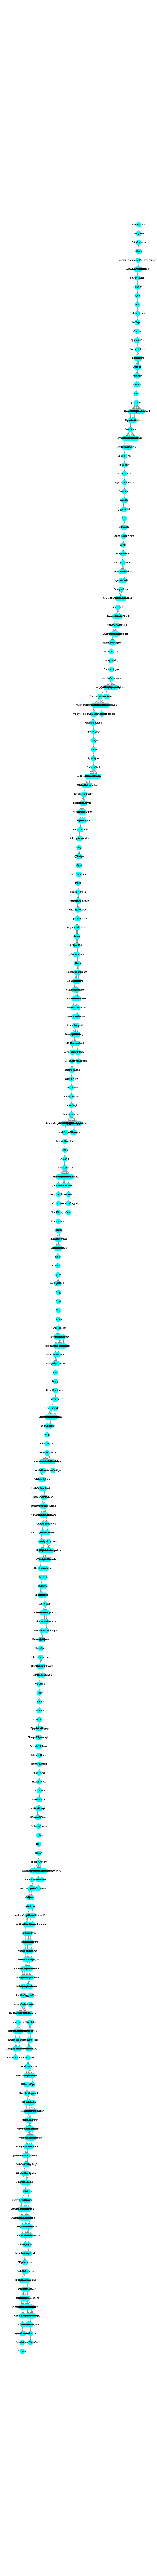

In [20]:
plt.figure(figsize = [12,200])

less_central = sorted(nx.closeness_centrality(g_book).items(), key=lambda items: items[1])[0]
tree = nx.dfs_tree(g_book, less_central[0])

# Generate positions for nodes using graphviz_layout
pos = graphviz_layout(tree, prog='dot')

# Draw the tree
nx.draw(tree, pos, with_labels= True, node_color='cyan', edge_color='gray', node_size = 800)
print("\nAlgorithm used: Depth First Search")
# Show the plot
plt.show()


<ipython-input-21-0faf718dce1b>:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(tree, prog='dot')



Algorithm used: Breath First Search


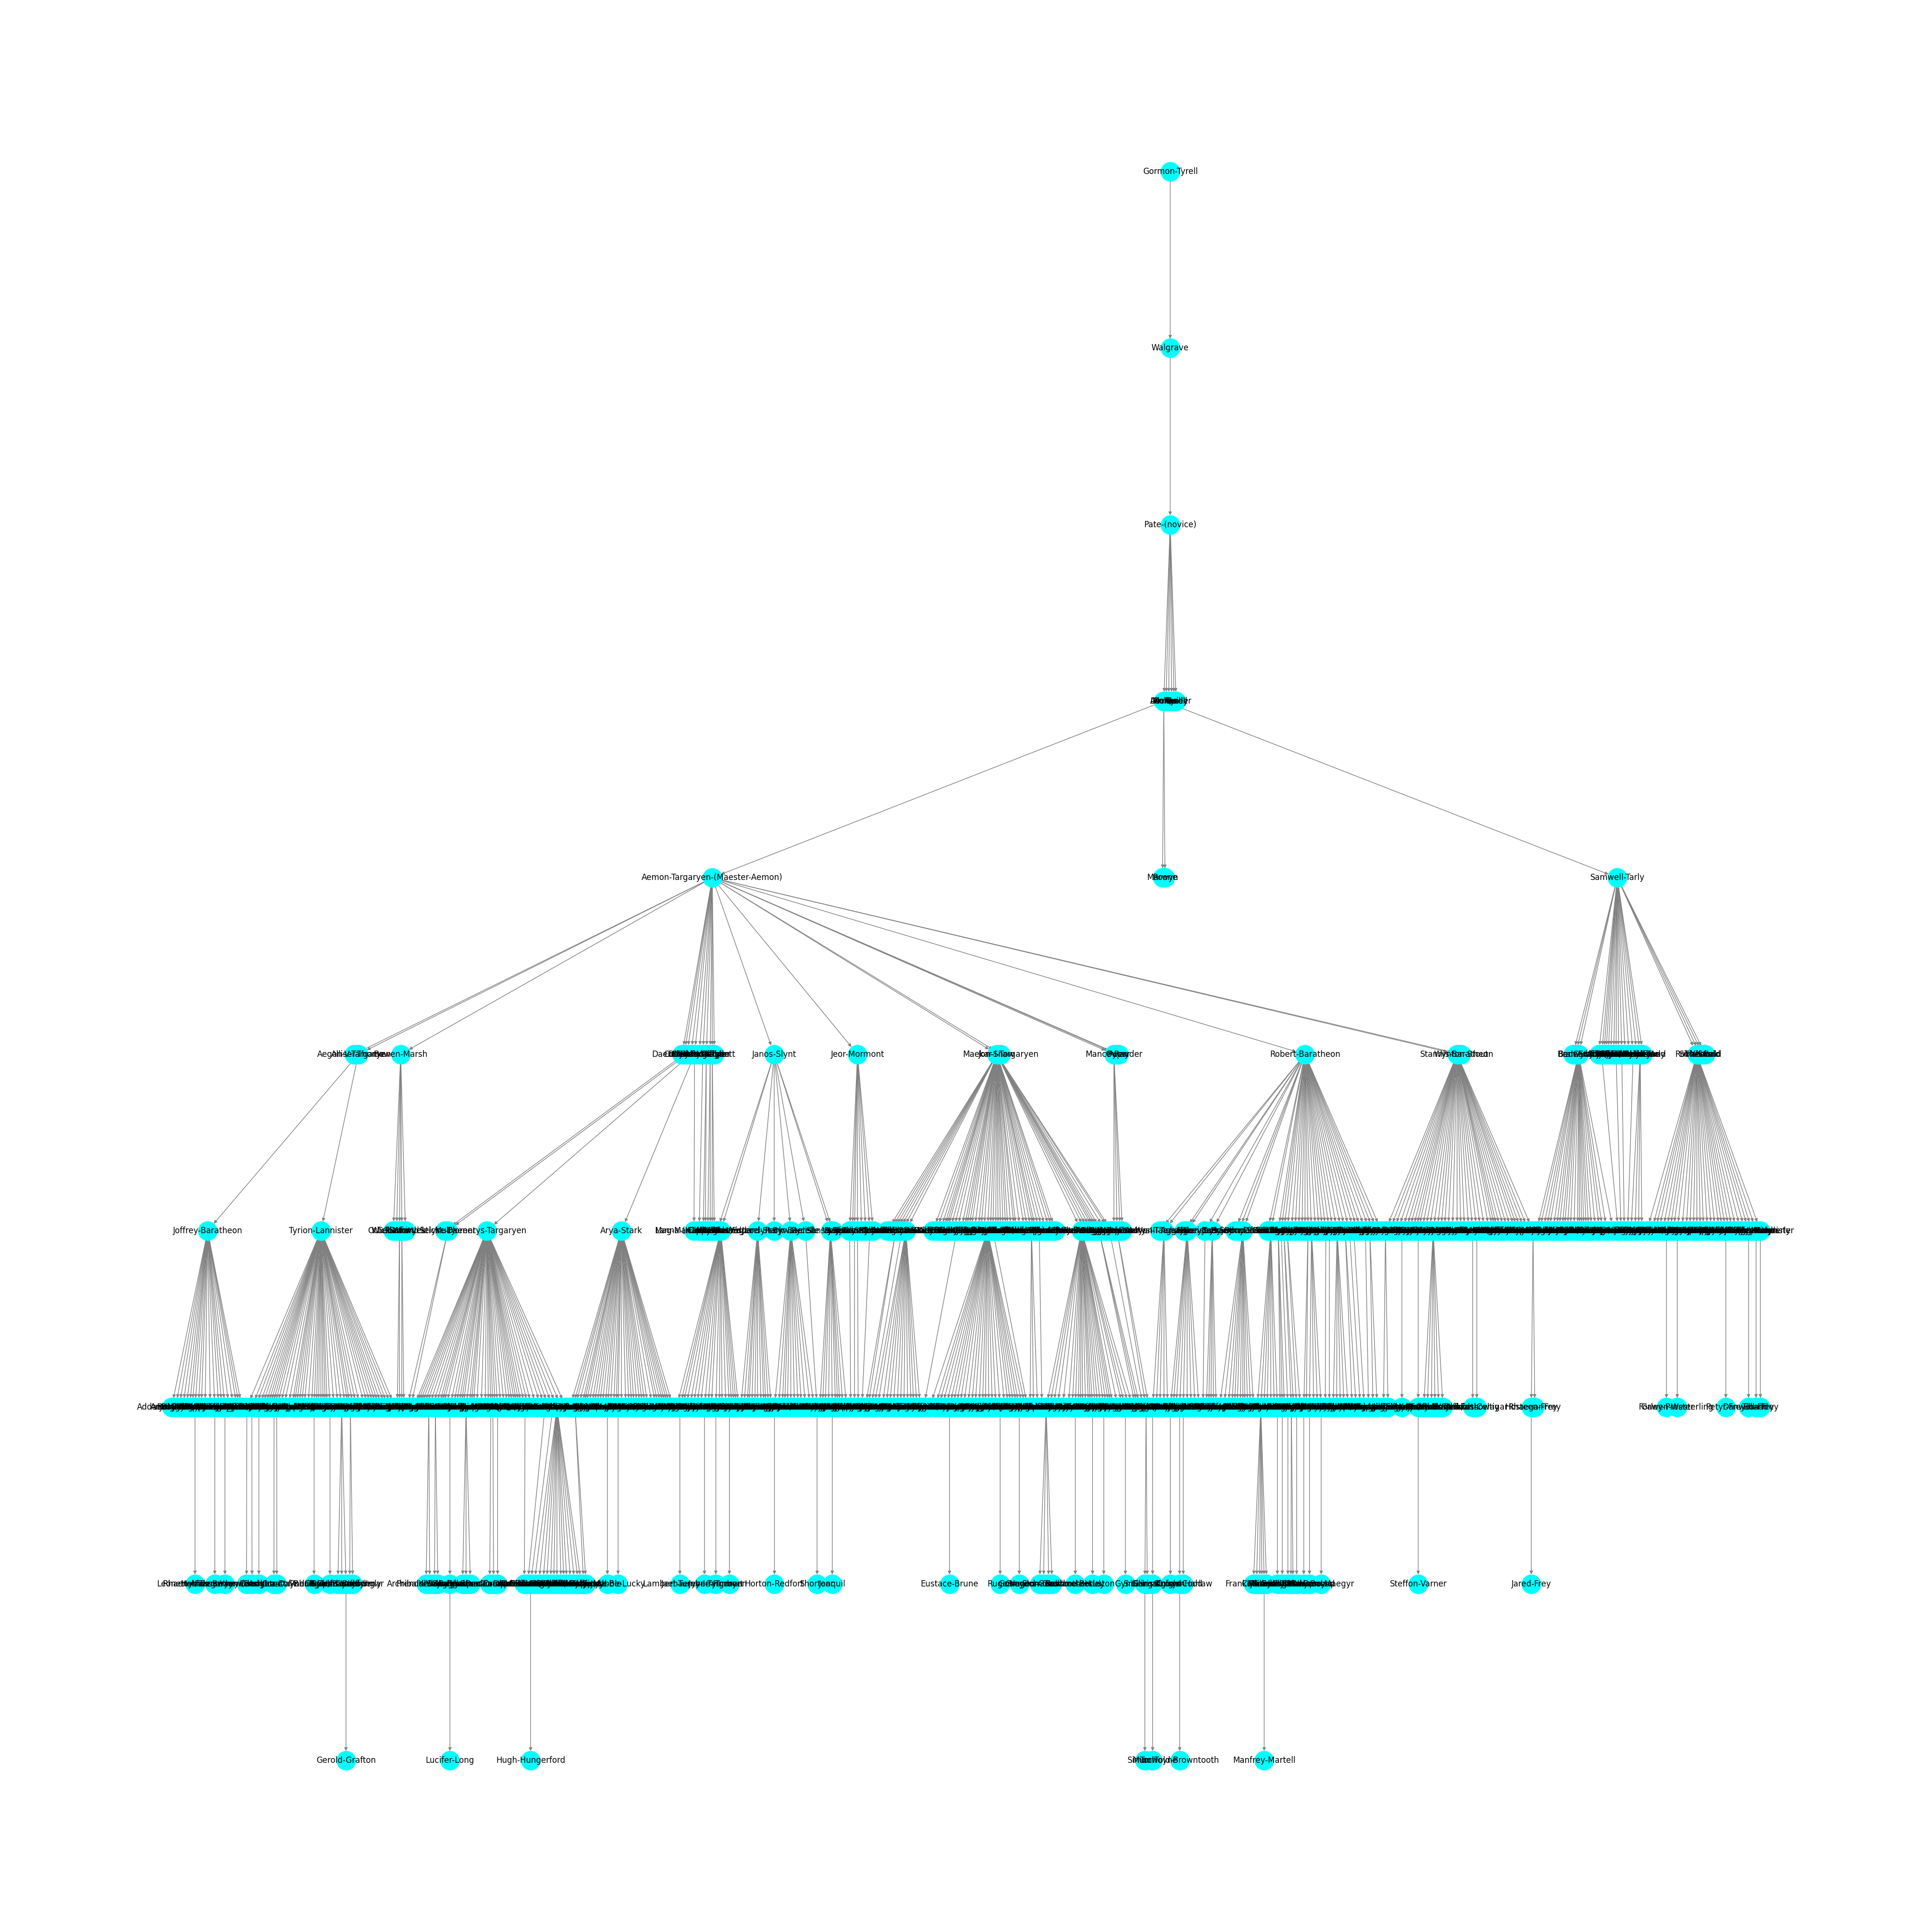

In [21]:
plt.figure(figsize = [40,40])

less_central = sorted(nx.closeness_centrality(g_book).items(), key=lambda items: items[1])[0]
tree = nx.bfs_tree(g_book, less_central[0])

# Generate positions for nodes using graphviz_layout
pos = graphviz_layout(tree, prog='dot')

# Draw the tree
nx.draw(tree, pos, with_labels= True, node_color='cyan', edge_color='gray',node_size = 800)
print("\nAlgorithm used: Breath First Search")
# Show the plot
plt.show()

💬 :

The generated trees look quite different from each other, which is expected as DFS and BFS algorithms traverse the graph in different ways. The DFS tree has a long chain of nodes while the BFS tree has more branching. The use of the graphviz_layout function has resulted in a clear and organized layout of the trees, making it easier to visualize the traversal of the graph. Overall, the plots effectively demonstrate the structure of the trees generated by the DFS and BFS algorithms.

* **💬 Compute the shortest path between the least and the most central nodes in the complete graph.**

The shortest path between the least central node (('Gormon-Tyrell', 0.15051117001135933)) and the most central node (('Tyrion-Lannister', 0.4763331336129419)) is:
['Tyrion-Lannister', 'Alliser-Thorne', 'Aemon-Targaryen-(Maester-Aemon)', 'Alleras', 'Pate-(novice)', 'Walgrave', 'Gormon-Tyrell']


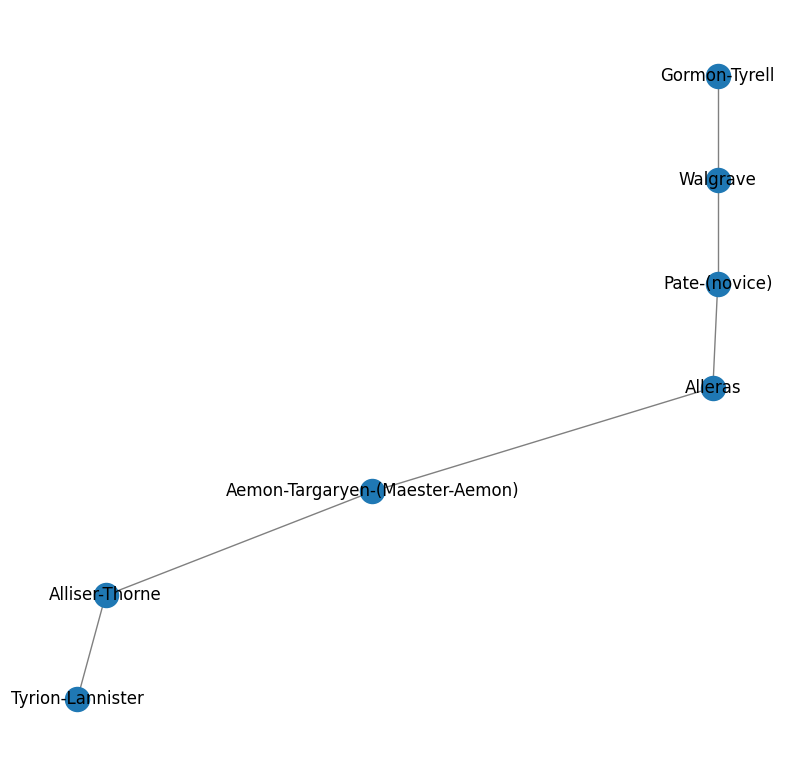

In [22]:
least_central = sorted(nx.closeness_centrality(g_book).items(), key=lambda items: items[1])[0]
most_central = sorted(nx.closeness_centrality(g_book).items(), key=lambda items: items[1])[-1]

shortest_path = nx.shortest_path(g_book, source=most_central[0], target=least_central[0])
print(f"The shortest path between the least central node ({least_central}) and the most central node ({most_central}) is:")
print(shortest_path)


shortest_path_graph = g_book.subgraph(shortest_path)

fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx(shortest_path_graph, pos=pos, edge_color='gray', ax=ax)
ax.set_axis_off()
plt.show()


💬 :
We can conclude that we can even reach the least connected node from the most connected one and going through a few nodes. Taking into account that this graph has a huge number of nodes and we can find shortest paths of few nodes, we can conclude that all nodes have many connections.

## 6. Random graph models
----
Up to this point, we have worked with a graph generated from the data extracted from the *Song of Ice and Fire* books. In the real world, however, obtaining the data needed to construct this graph can become very complex and expensive. This is one of the reasons why, over time, the synthetic generation of graphs has been studied.

In this section we will work on the different models described in class. We will generate random graphs and study their properties.

* **Generate random graphs with the Uniform, Gilbert and Barabási-Albert models. Fix the number of nodes to the order of the studied graph. Adjust the rest of the parameters of the graph generation function to obtain graphs with similar number of edges.**

### Erdös-Rény: Uniform Model (gnm)

In [23]:
g_uniform = nx.gnm_random_graph(n=g_book.order(), m=g_book.number_of_edges())

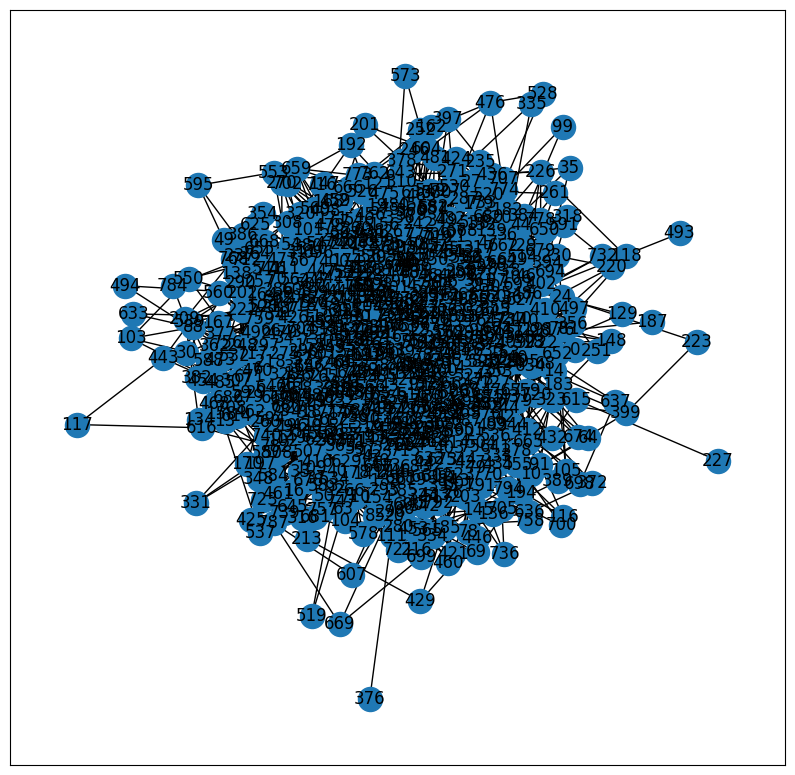

In [24]:
plt.figure(figsize=[10,10])
pos = nx.spring_layout(g_uniform, seed=42)
nx.draw_networkx(g_uniform, pos=pos)
plt.show()

### Erdös-Rény: Gilbert Model (gnp)


In [25]:
g_gilbert = nx.gnp_random_graph(n=g_book.order(), p=0.01 )

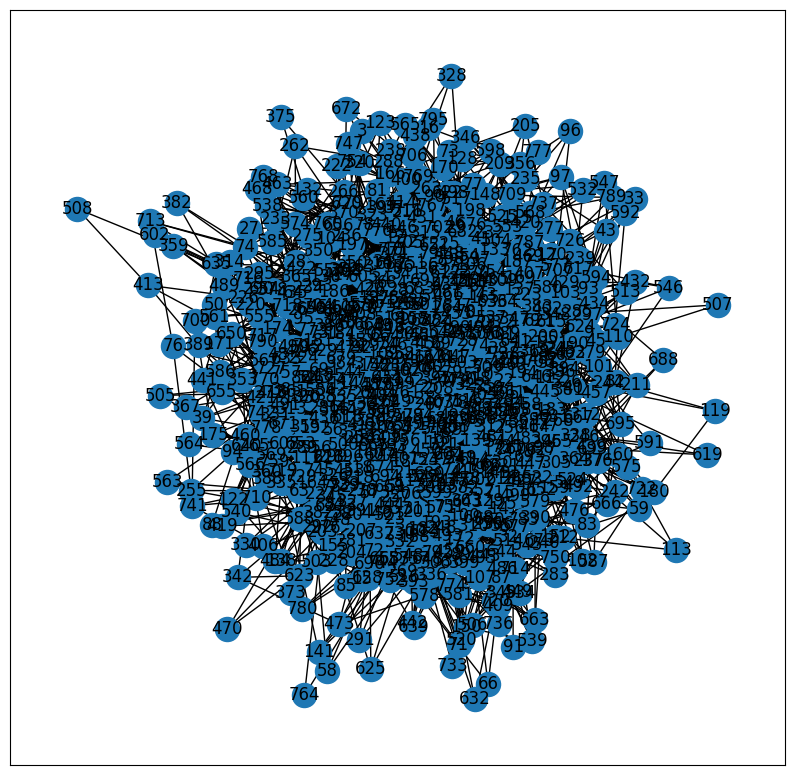

In [26]:
plt.figure(figsize=[10,10])
pos = nx.spring_layout(g_gilbert, seed=42)
nx.draw_networkx(g_gilbert, pos=pos)
plt.show()

### Barabási-Albert Model



In [27]:
g_barbasi = nx.barabasi_albert_graph(n=g_book.order(), m=4)

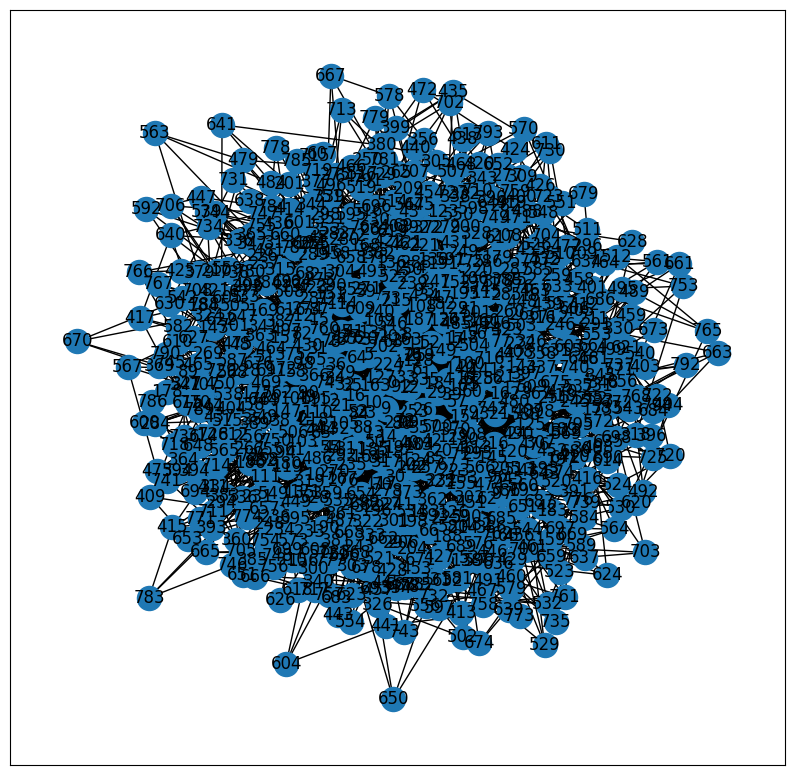

In [28]:
plt.figure(figsize=[10,10])
pos = nx.spring_layout(g_barbasi, seed=42)
nx.draw_networkx(g_barbasi, pos=pos)
plt.show()

In [29]:
g_dict = {'Book': g_book, 'Uniform': g_uniform, 'Erdos': g_gilbert, 'Barbasi': g_barbasi}

* **💬 Show the order and size of the graph as well as the average degree and clustering coefficient of its nodes. Compute also the intervals between the maximum and minimum centralities for each family of synthetic graphs. Make a small report of the main metrics. Which random graph resembles more closely the graph from the books?**
     * You can set the graph generation using a random seed. This way, two different runs will generate exactly the same graph.

In [30]:
def centrality_interval(G, centrality_measure):
    """
    Compute the interval between the maximum and minimum centrality values for a given centrality measure in a NetworkX graph.

    Parameters
    ----------
    G : NetworkX graph object
    centrality_measure : str
    The name of the centrality measure to use, e.g. 'degree', 'closeness', 'betweenness', etc.
    """
    centrality = getattr(nx, centrality_measure + '_centrality')(G)
    max_centrality = max(centrality.values())
    min_centrality = min(centrality.values())

    #The interval between the maximum and minimum centrality values for the given centrality measure.
    return max_centrality - min_centrality

for k, g in g_dict.items():
    average_degree = sum([g.degree(node) for node in g]) / g.order()

    #Sumary of the the main metrics of each graph 
    print("Graph: {}\nOrder: {:.2f}\nSize: {:.2f}\nAverage Degree: {:.2f}\nClustering Coefficient: {:.2f}\n".format(k, g.order(), g.number_of_edges(), average_degree, nx.average_clustering(g)))
    
    #Calculation of the centrality intervals between the maximum centrality value and the minimum centrality value for degree, closeness and betweeness centralities and for all graphs
    deg_cent = round(centrality_interval(g, "degree"), 3)
    close_cent = round(centrality_interval(g, "closeness"), 3)
    between_cent = round(centrality_interval(g, "betweenness"), 3)

    print(f"Degree centrality interval: {deg_cent}")
    print(f"Closeness centrality interval: {close_cent}")
    print(f"Betweenness centrality interval: {between_cent}", "\n\n--------------------------------------\n")

    #pass

Graph: Book
Order: 796.00
Size: 2823.00
Average Degree: 7.09
Clustering Coefficient: 0.49

Degree centrality interval: 0.152
Closeness centrality interval: 0.326
Betweenness centrality interval: 0.192 

--------------------------------------

Graph: Uniform
Order: 796.00
Size: 2823.00
Average Degree: 7.09
Clustering Coefficient: 0.01

Degree centrality interval: 0.023
Closeness centrality interval: 0.112
Betweenness centrality interval: 0.018 

--------------------------------------

Graph: Erdos
Order: 796.00
Size: 3179.00
Average Degree: 7.99
Clustering Coefficient: 0.01

Degree centrality interval: 0.019
Closeness centrality interval: 0.092
Betweenness centrality interval: 0.012 

--------------------------------------

Graph: Barbasi
Order: 796.00
Size: 3168.00
Average Degree: 7.96
Clustering Coefficient: 0.04

Degree centrality interval: 0.101
Closeness centrality interval: 0.197
Betweenness centrality interval: 0.101 

--------------------------------------



💬 :
Based on the output, we can see that the "Book" graph has the highest clustering coefficient, indicating a tightly-knit network. The "Barbasi" graph has the highest average degree, reflecting its scale-free nature where a few highly connected nodes dominate the network. The "Uniform" and "Erdos" graphs have similar structural properties, with low clustering coefficients and relatively uniform degree distributions. The centrality intervals for all graphs are relatively small, indicating that there is not a significant difference in node importance between the most central and least central nodes in each network. Overall, these summary metrics and centrality intervals provide insight into the structural properties of each graph and can be used to compare and contrast different network models.

Based on the summary metrics and centrality intervals, **the random graph that resembles more closely the graph from the book is the "Uniform" graph**. Both graphs have the same number of nodes and edges, and the same average degree, but the clustering coefficient of the book graph is much higher. However, the centrality intervals for degree, closeness, and betweenness centralities are similar in both graphs, indicating a similar distribution of node importance in the network. Therefore, the "Uniform" graph seems to be a good approximation of the book graph in terms of its structural properties.

* **💬 Check whether the networks (the three randomly generated ones and the network extracted from the books) follow a Power Law.**

In [33]:
#pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Calculating best minimal value for power law fit
Graph: Book
Power-law alpha:  2.367281042354076
Power-law xmin:  7.0


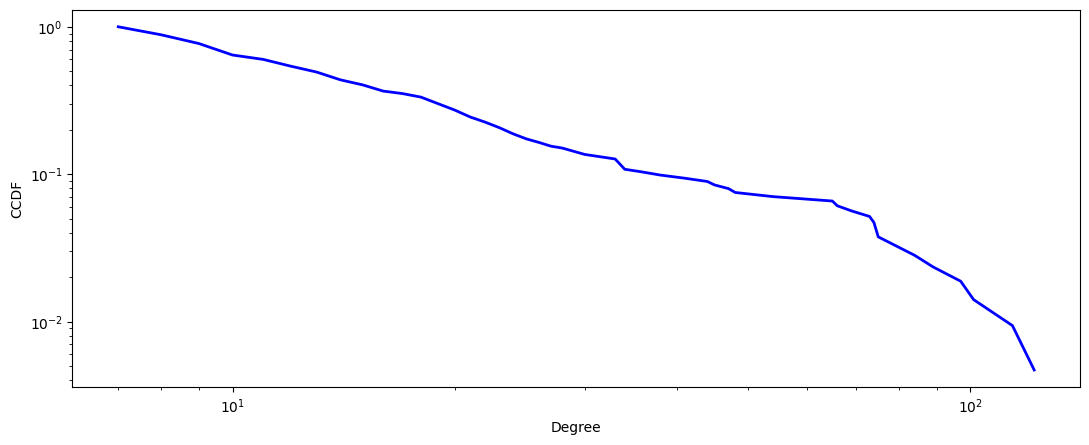

Calculating best minimal value for power law fit
Graph: Uniform
Power-law alpha:  15.266171491106823
Power-law xmin:  14.0


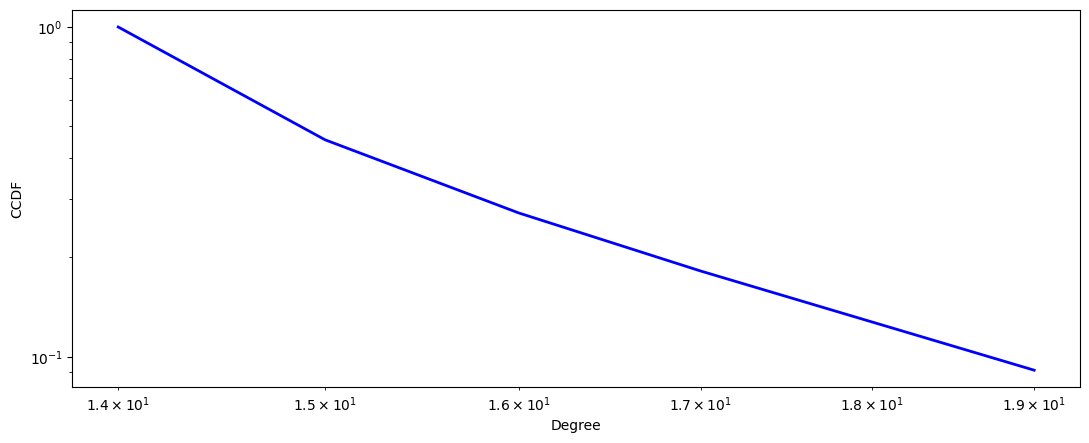

Calculating best minimal value for power law fit
Graph: Erdos
Power-law alpha:  9.907548790265311
Power-law xmin:  11.0


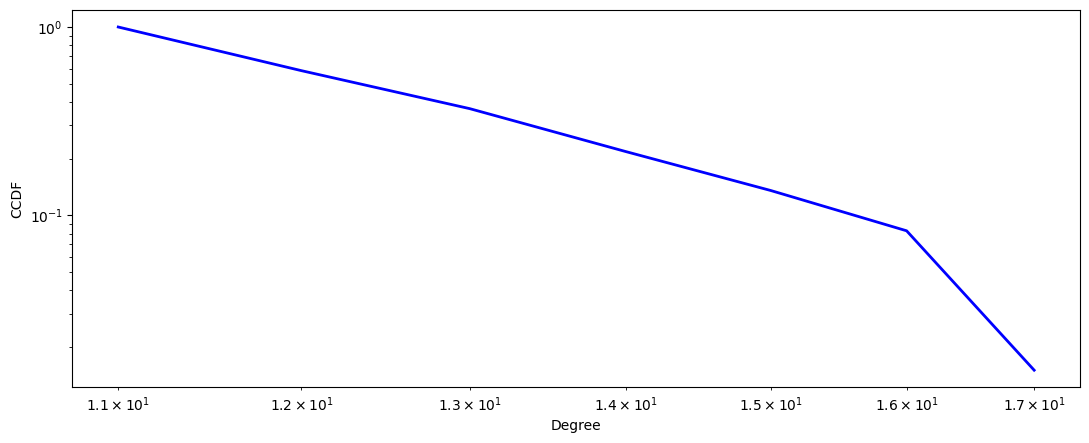

Calculating best minimal value for power law fit
Graph: Barbasi
Power-law alpha:  3.01406945448157
Power-law xmin:  7.0


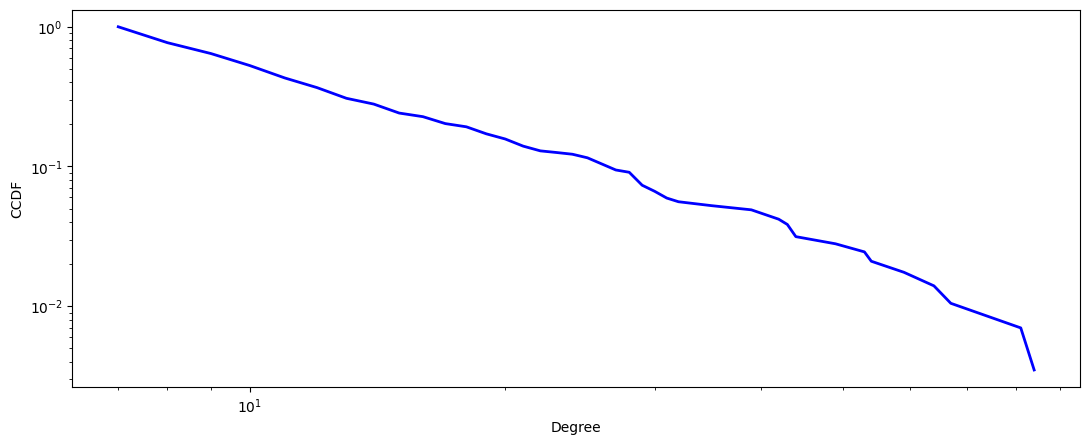

In [34]:
import powerlaw

for k, G in g_dict.items():
    plt.rcParams['figure.figsize'] = [13, 5]
    degrees = sorted([d for n, d in G.degree()], reverse=True)

    # Fit the degree sequence to a power-law distribution
    fit = powerlaw.Fit(degrees)

    # Print the results of the power-law fit
    print("Graph:", k)
    print("Power-law alpha: ", fit.alpha)
    print("Power-law xmin: ", fit.xmin)

    # Plot the degree distribution and the power-law fit
    fit.plot_ccdf(color='b', linewidth=2)
    plt.xlabel('Degree')
    plt.ylabel('CCDF')
    plt.show()

💬 :
According to this results, each network is described by a power-law with a given exponent (alpha) and a minimum value (xmin) that optimizes the fit of the power-law model to the data.